In [182]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

import random
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats
from sklearn.preprocessing import StandardScaler

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
#import scikit_posthocs

In [183]:
age = [42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]


**Q1. Compute the mean, median and the mode of the data**


In [184]:
print('Mean :',round(np.mean(age),3))
print('Median :',round(np.median(age),3))
#print('Mode :',round(np.mode(age),3))

Mean : 34.467
Median : 31.5


**Q2. Compute the range , variance and standard deviation of customer ages**

In [185]:
print('Range :',max(age) - min(age))
print('Variance :',round(np.var(age),3))
print('Standard deviation :',round(np.std(age),3))

Range : 48
Variance : 171.449
Standard deviation : 13.094


**Q3. Find the mean deviation for the data**

In [186]:
mean = np.mean(age)
devia = sum([abs(x - mean) for x in age])
meandevia = round(devia /len(age),3)
print('Mean Deviation :',meandevia)

Mean Deviation : 10.764


**Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data**

In [187]:
skew = stats.skew(age)
print('Skewness :',round(skew,3))

Skewness : 0.755


In [188]:
mean = np.mean(age)
median = np.median(age)
stdev = np.std(age)

skewness = 3 * (mean - median) / stdev

print("Pearson coefficient of skewness:", round(skewness,3))

Pearson coefficient of skewness: 0.68


Since the Pearson coefficient of skewness is positive, we can say that the distribution of the data is slightly skewed to the right.

**Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.**

In [189]:
mean = np.mean(age)
stddev = np.std(age)

lower_limit = mean - 2 * stddev
upper_limit = mean + 2 * stddev

val = [x for x in age if lower_limit <= x <= upper_limit]
count = len(val)
print(val)
print("Number of values within 2 standard deviations of the mean:", count)

[42, 44, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]
Number of values within 2 standard deviations of the mean: 28


For k=2, Chebyshev's theorem(1-1/k^2) states that at least 1 - 1/2^2 = 0.75 or 75% of the data values will fall within two standard deviations of the mean. In our case, we found that 28 out of 30 data values fall within this range, which is more than 75%. This is expected, as Chebyshev's theorem gives a lower bound on the proportion of data values that fall within a certain range, and our dataset appears to be relatively symmetric and unimodal, which makes it likely that a higher proportion of values fall within two standard deviations of the mean.

**Q6. Find the three quartiles and the interquartile range (IQR)**

In [190]:
q1 = np.percentile(age, 25)
q2 = np.percentile(age, 50)
q3 = np.percentile(age, 75)

iqr = q3 - q1

print("Q1 (Lower Quartile):", q1)
print("Q2 (median):", q2)
print("Q3 (upper Quartile):", q3)
print("IQR:", iqr)

Q1 (Lower Quartile): 23.25
Q2 (median): 31.5
Q3 (upper Quartile): 41.75
IQR: 18.5


**Q7. Are there any outliers in the data set ?**

In [191]:
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

outliers = [x for x in age if x < lower_bound or x > upper_bound]

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)
print("Outliers:", outliers)

Upper bound: 69.5
Lower bound: -4.5
Outliers: []


There is no outliers in the age dataset

**Q8. Draw a boxplot of the dataset to confirm**

<AxesSubplot:>

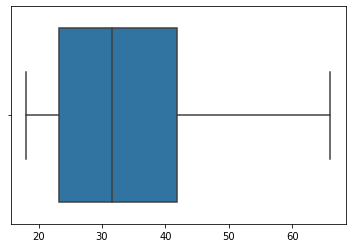

In [192]:
sns.boxplot(age)

It proves there is no outliers

**Q9. Find the percentile rank of the datapoint 50.**

In [193]:
num_below_50 = len([x for x in age if x < 50])
total_num = len(age)

percentile_rank = (num_below_50 / total_num) * 100

print("Percentile rank of 50:", round(percentile_rank,3))

Percentile rank of 50: 83.333


**Q10. What is the probability that a person ordering an EV scooter is above 50 years old?**

In [194]:
num_above_50 = len([x for x in age if x > 50])
total_num = len(age)

proportion_above_50 = num_above_50 / total_num

print("Proportion of people above 50:", round(proportion_above_50,3))

Proportion of people above 50: 0.133


**Q11. Create a frequency distribution for the data and visualize it appropriately**

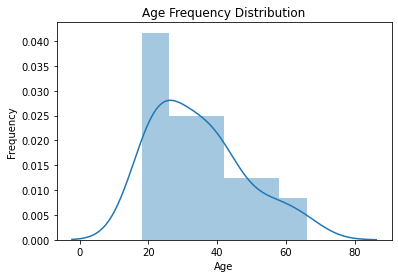

In [195]:
sns.distplot(age,bins = 6)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.show()

**Q12. Create a probability distribution of the data and visualize it appropriately.**

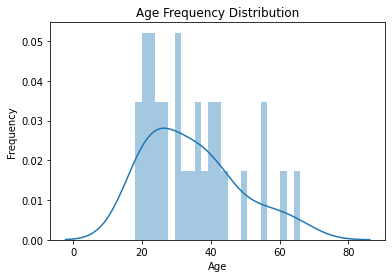

In [196]:
sns.distplot(age,bins = 25,)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')
plt.show()

**Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?**

<AxesSubplot:ylabel='Density'>

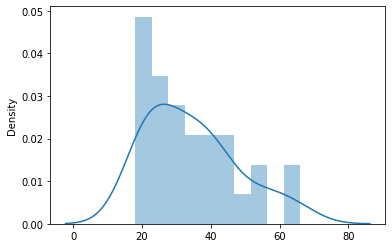

In [197]:
sns.distplot(age,bins =10)

From the histogram, we can see that the distribution of the dataset is roughly normal with a slight right skew

In [198]:
print('Skewness:', stats.skew(age))
print('Kurtosis:', stats.kurtosis(age))

Skewness: 0.7553641682223312
Kurtosis: -0.2847295826508738


Since the skewness is positive and the kurtosis is negative, this supports the conclusion that the distribution is slightly right-skewed

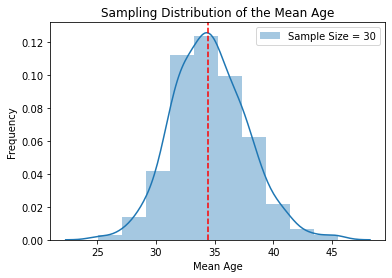

In [199]:
sample_sizes = [10, 15, 20, 25, 30]
sample_means = []
for n in sample_sizes:
    for i in range(100):
        sample = np.random.choice(age, size=n, replace=True)
        sample_means.append(np.mean(sample))
sns.distplot(sample_means, bins =10, label='Sample Size = {}'.format(n))
plt.axvline(x=np.mean(age), color='red', linestyle='--')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean Age')
plt.legend()
plt.show()

As the sample size increases, the sampling distribution of the mean age of customers becomes more normally distributed, with a tighter distribution around the population mean. This is in line with the Central Limit Theorem, which states that as the sample size increases, the sampling distribution of the mean of a random variable approaches a normal distribution, regardless of the underlying distribution of the population.

**Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?**

In [200]:
p = len([a for a in age if a > 50]) / len(age)
n = 10
k = 6
prob = stats.binom.pmf(k, n, p)
print("The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is:", round(prob,5))

The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is: 0.00067


**Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.
[  Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]**

In [201]:
p = 0.1 
n = 300
x =25
mu = n*p
sigma = (n * p * (1 - p)) ** 0.5  
lower_bound = (x - 0.5 - mu) / sigma
upper_bound = (x + 0.5 - mu) / sigma
prob = stats.norm.cdf(upper_bound) - stats.norm.cdf(lower_bound)

print("The probability of exactly 25 customers being above 50 years of age is:", round(prob,3))

The probability of exactly 25 customers being above 50 years of age is: 0.048


**Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.(State reasons as to why did you use a z or t distribution**

In [202]:
CI = 0.95
std = np.std(age)
interval = stats.norm.interval(0.95, loc=np.mean(age),scale=std/np.sqrt(len(age)))
print(interval)

(29.781178977640657, 39.15215435569268)


we can use a t-distribution to compute the confidence interval if the sample size is small (less than 30) or the population standard deviation is unknown. If the sample size is large (greater than or equal to 30) and the population standard deviation is known or the sample size is sufficiently large, then we can use a z-distribution.

**Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.**

In [203]:
p = 0.20    # Proportion of people who own an EV in the population
E = 0.02    # Desired margin of error
z = stats.norm.ppf(0.975)    # Critical value at 95% confidence level

# Compute minimum sample size
n = int((z**2 * p * (1-p)) / E**2 + 0.5)    # round up to nearest integer

print("Minimum sample size necessary:", n)

Minimum sample size necessary: 1537


**Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary**

In [204]:
p = 0.5    # Conservative estimate of proportion of executives who own an EV
E = 0.05    # Desired margin of error
z = stats.norm.ppf(0.95)    # Critical value at 90% confidence level

# Compute minimum sample size
n = int((z**2 * p * (1-p)) / E**2 + 0.5)    # round up to nearest integer

print("Minimum sample size necessary:", n)

Minimum sample size necessary: 271


**Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.**

In [205]:
H0 = 'less than 20% of population are owning EVs'
Ha = '20% of population are owning EVs'
n = 30    # Sample size
p = 0.20    # Proportion of population that owns EVs
x = 5    # Number of two-wheeler owners who own EVs in the sample

# Calculate p-value
p_value = stats.binom.cdf(x, n, p)

print("p-value:", p_value)

p-value: 0.427512437590322


p value is greated than 0.05 so we faild to reject null hypo. thus we conclude less than 20% of population are owning EVs

**Q20. Assume you are working for a Consumer Protection Agency that looks at
complaints raised by customers for the transportation industry. Say you have
been receiving complaints about the mileage of the latest EV launched by the
Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test
mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the
highway. Your results show a mean of 91.3 kmpl and a standard deviation of
14.4.
a. Show why you support Zen’s claim using the P-value obtained.
b. After more complaints you decide to test the variability of the mileage on
the highway. On questioning Zen’s quality control engineer , you find
that they are claiming a standard deviation of 7.2. Test the claim about
the standard deviation. [Hint :use the Chi-square test for
variance/standard deviation]
c. Write a summary of results and the action that Zen must take to remedy
the complaints.
d. What is your position on performing the test for variability along with the
test for means?**

In [206]:
H0 = 'the true population mean mileage is 96 kmpl(milage >= 96)'
Ha = 'the true population mean is less than 96 kmpl(milage< 96)'

In [207]:
x_bar = 91.3    # Sample mean mileage
s = 14.4    # Sample standard deviation
n = 40    # Sample size
mu = 96    # Population mean mileage assumed by Zen

# Calculate t statistic and p-value
z_score = (x_bar - mu) / (s / np.sqrt(n))
p_value = stats.norm.cdf(z_score)
print('Z_score :',z_score)
print('p_value :',p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z_score : -2.0642645837210267
p_value : 0.019496318512763594
Reject the null hypothesis.


Therefore, based on the P-value obtained, we reject Zen's claim that the new EVs get a mileage of 96 kmpl on the highway.

In [208]:
# Hypothesis H0: sig=7.2(claim)  vs H1: sig >7.2
n=40
sig=7.2
s=14.4
chi=(n-1)*s**2/sig**2
chi

156.0

The p-value is greater than the significance level of alpha = 0.05, which means we fail to reject the null hypothesis. Therefore, there is not enough evidence to suggest that the true population standard deviation is

3. Zen's claim about mileage has been proven false. It is recommended that Zen lower the claim about highway kmpl of the EVs. Also Zen should try to reduce the variability in Kmpl

4. Mostly mean is fine but if there are a lot of variabilities then there will be complaints due to lack of consistency.

**Q21. Write a report comparing and contrasting Descriptive vs Inferential
Statistics in about 200-500 words and how each helps to get more insight into
the data at hand.**

Descriptive statistics is the branch of statistics that focuses on summarizing and describing the main features of a dataset. It is used to provide an overview of the data by summarizing and organizing it in a way that is easy to understand. Descriptive statistics uses measures such as mean, median, mode, range, variance, and standard deviation to describe the data. It helps to identify patterns, trends, and relationships in the data. For instance, descriptive statistics can be used to calculate the average income of a group of people, the percentage of people with a particular disease, or the distribution of scores in a test.

In contrast, inferential statistics is the branch of statistics that focuses on making inferences about a population based on a sample. Inferential statistics is used when it is not feasible to study the entire population, and we want to make inferences about the population from a smaller sample. It involves the use of probability theory to estimate parameters of a population based on a sample. For instance, inferential statistics can be used to test whether there is a significant difference in the average income of two groups of people, or whether a new treatment is effective in reducing the symptoms of a particular disease.

While descriptive statistics provides a summary of the data, inferential statistics provides a way to test hypotheses and make predictions about the population based on a sample. Descriptive statistics helps to identify patterns and relationships in the data, while inferential statistics helps to draw conclusions about the population based on the sample. Both descriptive and inferential statistics are important in understanding data and making decisions based on data.

In conclusion, descriptive and inferential statistics are two important branches of statistics that are used to analyze and interpret data. Descriptive statistics provides a summary of the data, while inferential statistics helps to test hypotheses and make predictions about the population. Both branches of statistics are essential in understanding data and making informed decisions. By using descriptive and inferential statistics together, we can gain a deeper understanding of the data and make more accurate predictions and decisions based on the data.

# PART B

In [209]:
df = pd.read_csv('Basketball.csv')
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


In [210]:
df.shape

(61, 13)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [212]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [213]:
sum(df.duplicated())

0

In [214]:
df.drop(60, inplace=True)

In [215]:
df['Score'] = df['Score'].astype(int)

In [216]:
df = df.replace('-',np.nan)

In [217]:
df.isnull().sum()/len(df)*100

Team                    0.000000
Tournament              0.000000
Score                   0.000000
PlayedGames             0.000000
WonGames                0.000000
DrawnGames              0.000000
LostGames               0.000000
BasketScored            0.000000
BasketGiven             0.000000
TournamentChampion     85.000000
Runner-up              78.333333
TeamLaunch              0.000000
HighestPositionHeld     0.000000
dtype: float64

In [218]:
df = df.drop('TournamentChampion', axis = 1)

In [219]:
df = df.drop('Runner-up', axis = 1)

In [220]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [221]:
df['TeamLaunch'] = df['TeamLaunch'].str.replace('to', '-').str.replace('~', '-').str.replace('_', '-')

In [222]:
df['TeamLaunch'] = df['TeamLaunch'].str.split('-')

In [223]:
df[['TeamLaunch','Year2']] = df['TeamLaunch'].apply(lambda x: pd.Series(x))

In [224]:
df.drop('Year2',axis = 1,inplace = True)

In [225]:
# df

In [226]:
df['PlayedGames'] = df['PlayedGames'].astype(int)

In [227]:
df['WonGames'] = df['WonGames'].astype(int)

In [228]:
df['DrawnGames'] = df['DrawnGames'].astype(int)

In [229]:
df['LostGames'] = df['LostGames'].astype(int)

In [230]:
df['BasketScored'] = df['BasketScored'].astype(int)

In [231]:
df['BasketGiven'] = df['BasketGiven'].astype(int)

In [232]:
df['TeamLaunch'] = df['TeamLaunch'].astype(int)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     int32 
 3   PlayedGames          60 non-null     int32 
 4   WonGames             60 non-null     int32 
 5   DrawnGames           60 non-null     int32 
 6   LostGames            60 non-null     int32 
 7   BasketScored         60 non-null     int32 
 8   BasketGiven          60 non-null     int32 
 9   TeamLaunch           60 non-null     int32 
 10  HighestPositionHeld  60 non-null     int64 
dtypes: int32(8), int64(2), object(1)
memory usage: 3.4+ KB


In [234]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1932,1


In [251]:
df['Winning_Percentage'] = df['WonGames']/df['PlayedGames']*100

In [256]:
best_performing_team = df.sort_values(by=["Winning_Percentage"], ascending=False).iloc[0]["Team"]
print(f"The best performing team is {best_performing_team}.")

The best performing team is Team 1.


In [252]:
df['Loss_Percentage'] = df['LostGames']/df['PlayedGames']*100

In [281]:
team_with_lowest_performance = df.sort_values(by=["Loss_Percentage"], ascending=False).iloc[0]["Team"]
print(f"The team with the lowest performance is {team_with_lowest_performance}.")

The team with the lowest performance is Team 60.


In [280]:
oldest_team_LD = df.sort_values(by=["TeamLaunch"], ascending=True).iloc[0]["TeamLaunch"]
oldest_team = df[df['TeamLaunch'] == oldest_team_LD]
# oldest_team['Team']
print(f"The oldest team is {oldest_team['Team']}.")

The oldest team is 0      Team 1
1      Team 2
2      Team 3
4      Team 5
6      Team 7
7      Team 8
13    Team 14
44    Team 45
51    Team 52
53    Team 54
Name: Team, dtype: object.


In [285]:
team_with_highest_goals = df.sort_values(by=["BasketScored"], ascending=False).iloc[0]["Team"]
print(f"The team with the highest goals is {team_with_highest_goals}.")

The team with the highest goals is Team 1.


In [286]:
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Winning_Percentage,Loss_Percentage
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,59.630702,20.383780
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,57.241130,22.013034
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,47.475134,29.648049
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,44.557057,32.319820
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,43.772629,33.309196
5,Team 6,73,2819,2408,990,531,887,3680,3373,1934,1,41.112957,36.835548
6,Team 7,82,2792,2626,948,608,1070,3609,3889,1929,3,36.100533,40.746382
7,Team 8,70,2573,2302,864,577,861,3228,3230,1929,1,37.532580,37.402259
8,Team 9,58,2109,1986,698,522,766,2683,2847,1939,2,35.146022,38.569990
9,Team 10,51,1884,1728,606,440,682,2159,2492,1932,1,35.069444,39.467593


In [282]:
df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,Winning_Percentage,Loss_Percentage
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1957.950000,7.050000,31.364790,44.991949
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,26.646732,5.315232,7.831199,8.400881
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1929.000000,1.000000,16.666667,20.383780
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1934.750000,3.000000,27.607494,41.142971
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,1950.500000,6.000000,30.491722,45.727107
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,1977.250000,10.000000,33.540164,48.542449
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,2016.000000,20.000000,59.630702,70.000000


In [283]:
num_colums=df.select_dtypes(include = 'number')

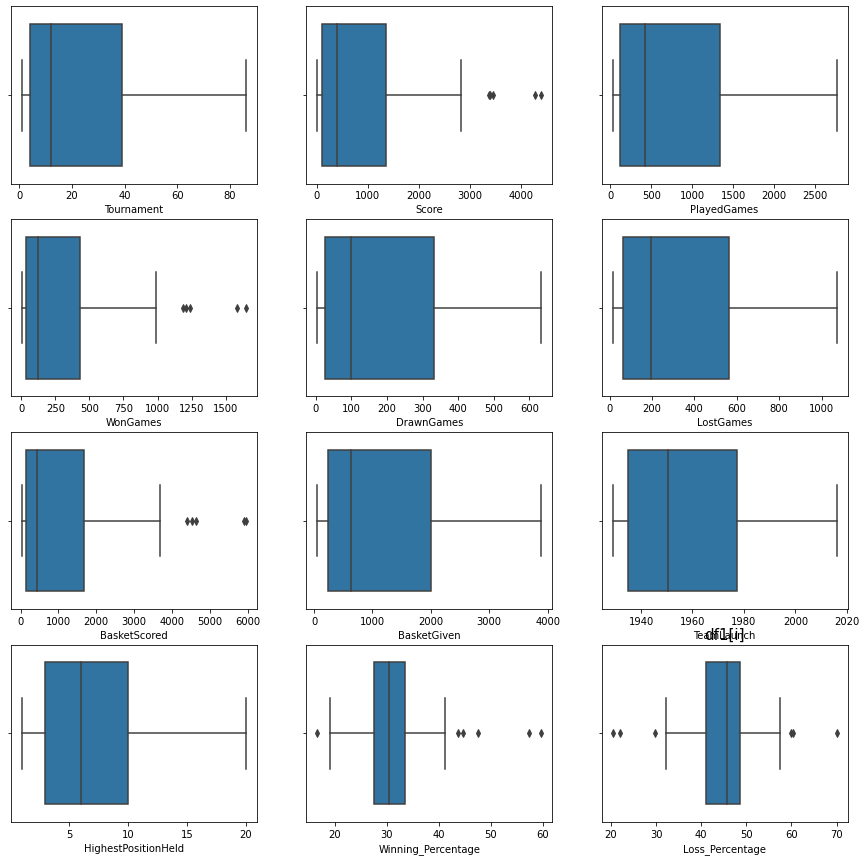

In [287]:
fig,axs = plt.subplots(4,3,figsize =(15,15))
for i, subplots in zip(num_colums,axs.flatten()):
    sns.boxplot(df[i],ax=subplots)
    plt.title('df1[i]',fontsize = 15)
plt.show()

In [288]:
for i in num_colums:
    q1,q3 = np.quantile(df[i],[0.25,0.75])
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    df[i] = np.where(df[i] > ub, ub, df[i])
    df[i] = np.where(df[i] < lb, lb, df[i])

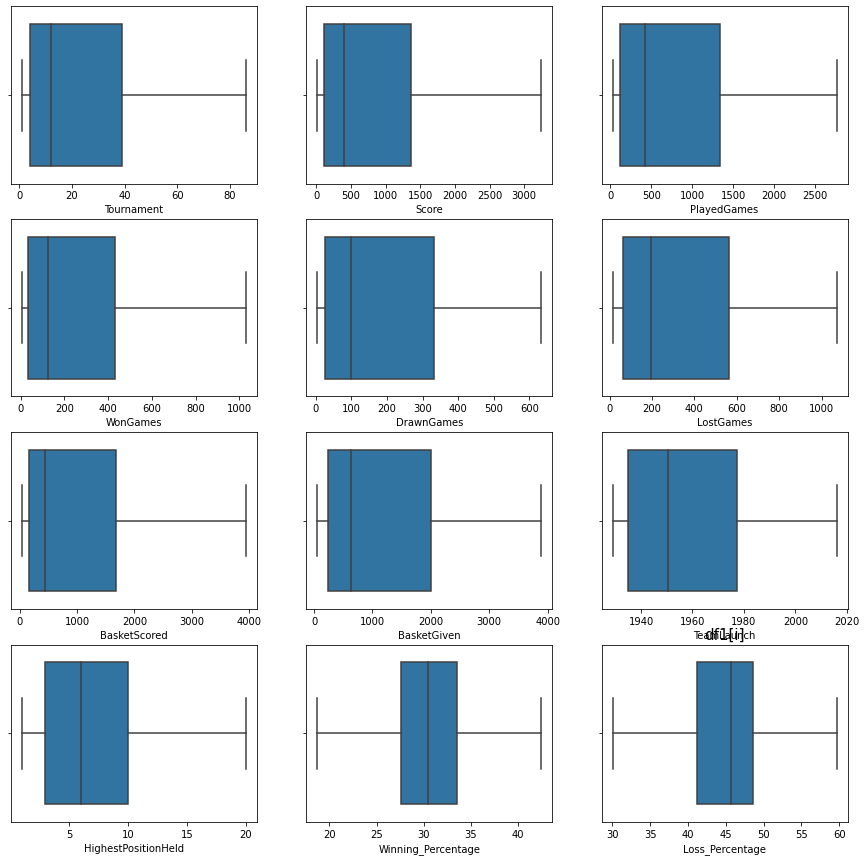

In [290]:
fig,axs = plt.subplots(4,3,figsize =(15,15))
for i, subplots in zip(num_colums,axs.flatten()):
    sns.boxplot(df[i],ax=subplots)
    plt.title('df1[i]',fontsize = 15)
plt.show()

In [ ]:
# fig,axs = plt.subplots(4,3,figsize =(15,15))
# for i, subplots in zip(num_colums,axs.flatten()):
#     sns.violinplot(df[i],ax=subplots)
#     plt.title('df1[i]',fontsize = 15)
# plt.show()

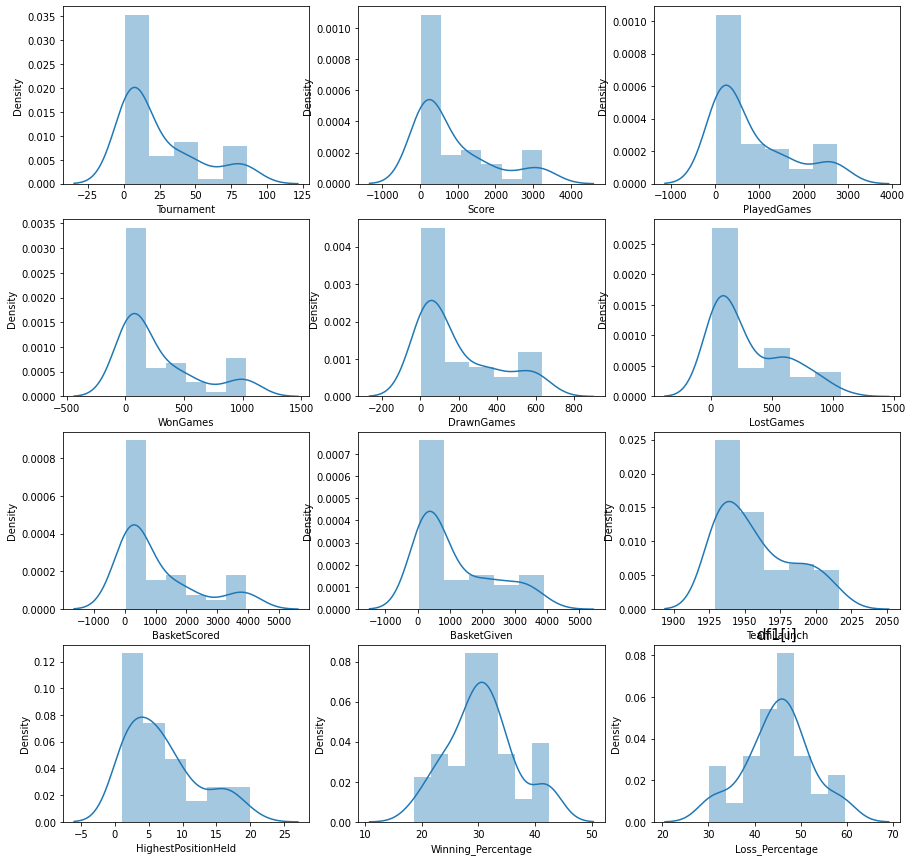

In [292]:
fig,axs = plt.subplots(4,3,figsize =(15,15))
for i, subplots in zip(num_colums,axs.flatten()):
    sns.distplot(df[i],ax=subplots)
    plt.title('df1[i]',fontsize = 15)
plt.show()

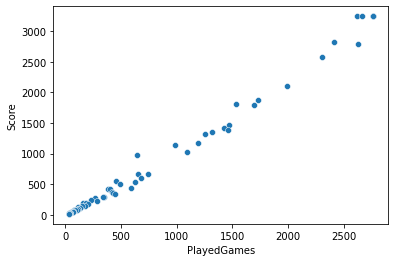

In [293]:
sns.scatterplot(x = df['PlayedGames'], y = df['Score'])
plt.show()

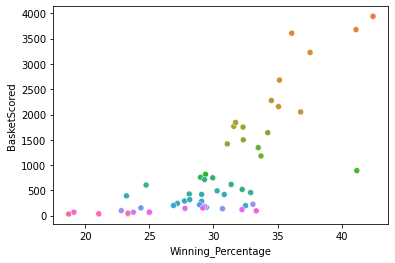

In [311]:
sns.scatterplot(x = df['Winning_Percentage'], y = df['BasketScored'],hue=df['Team'],legend=False)
plt.show()

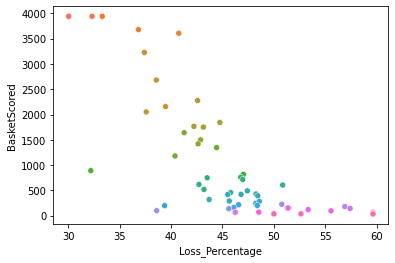

In [312]:
sns.scatterplot(x = df['Loss_Percentage'], y = df['BasketScored'],hue=df['Team'],legend=False)
plt.show()

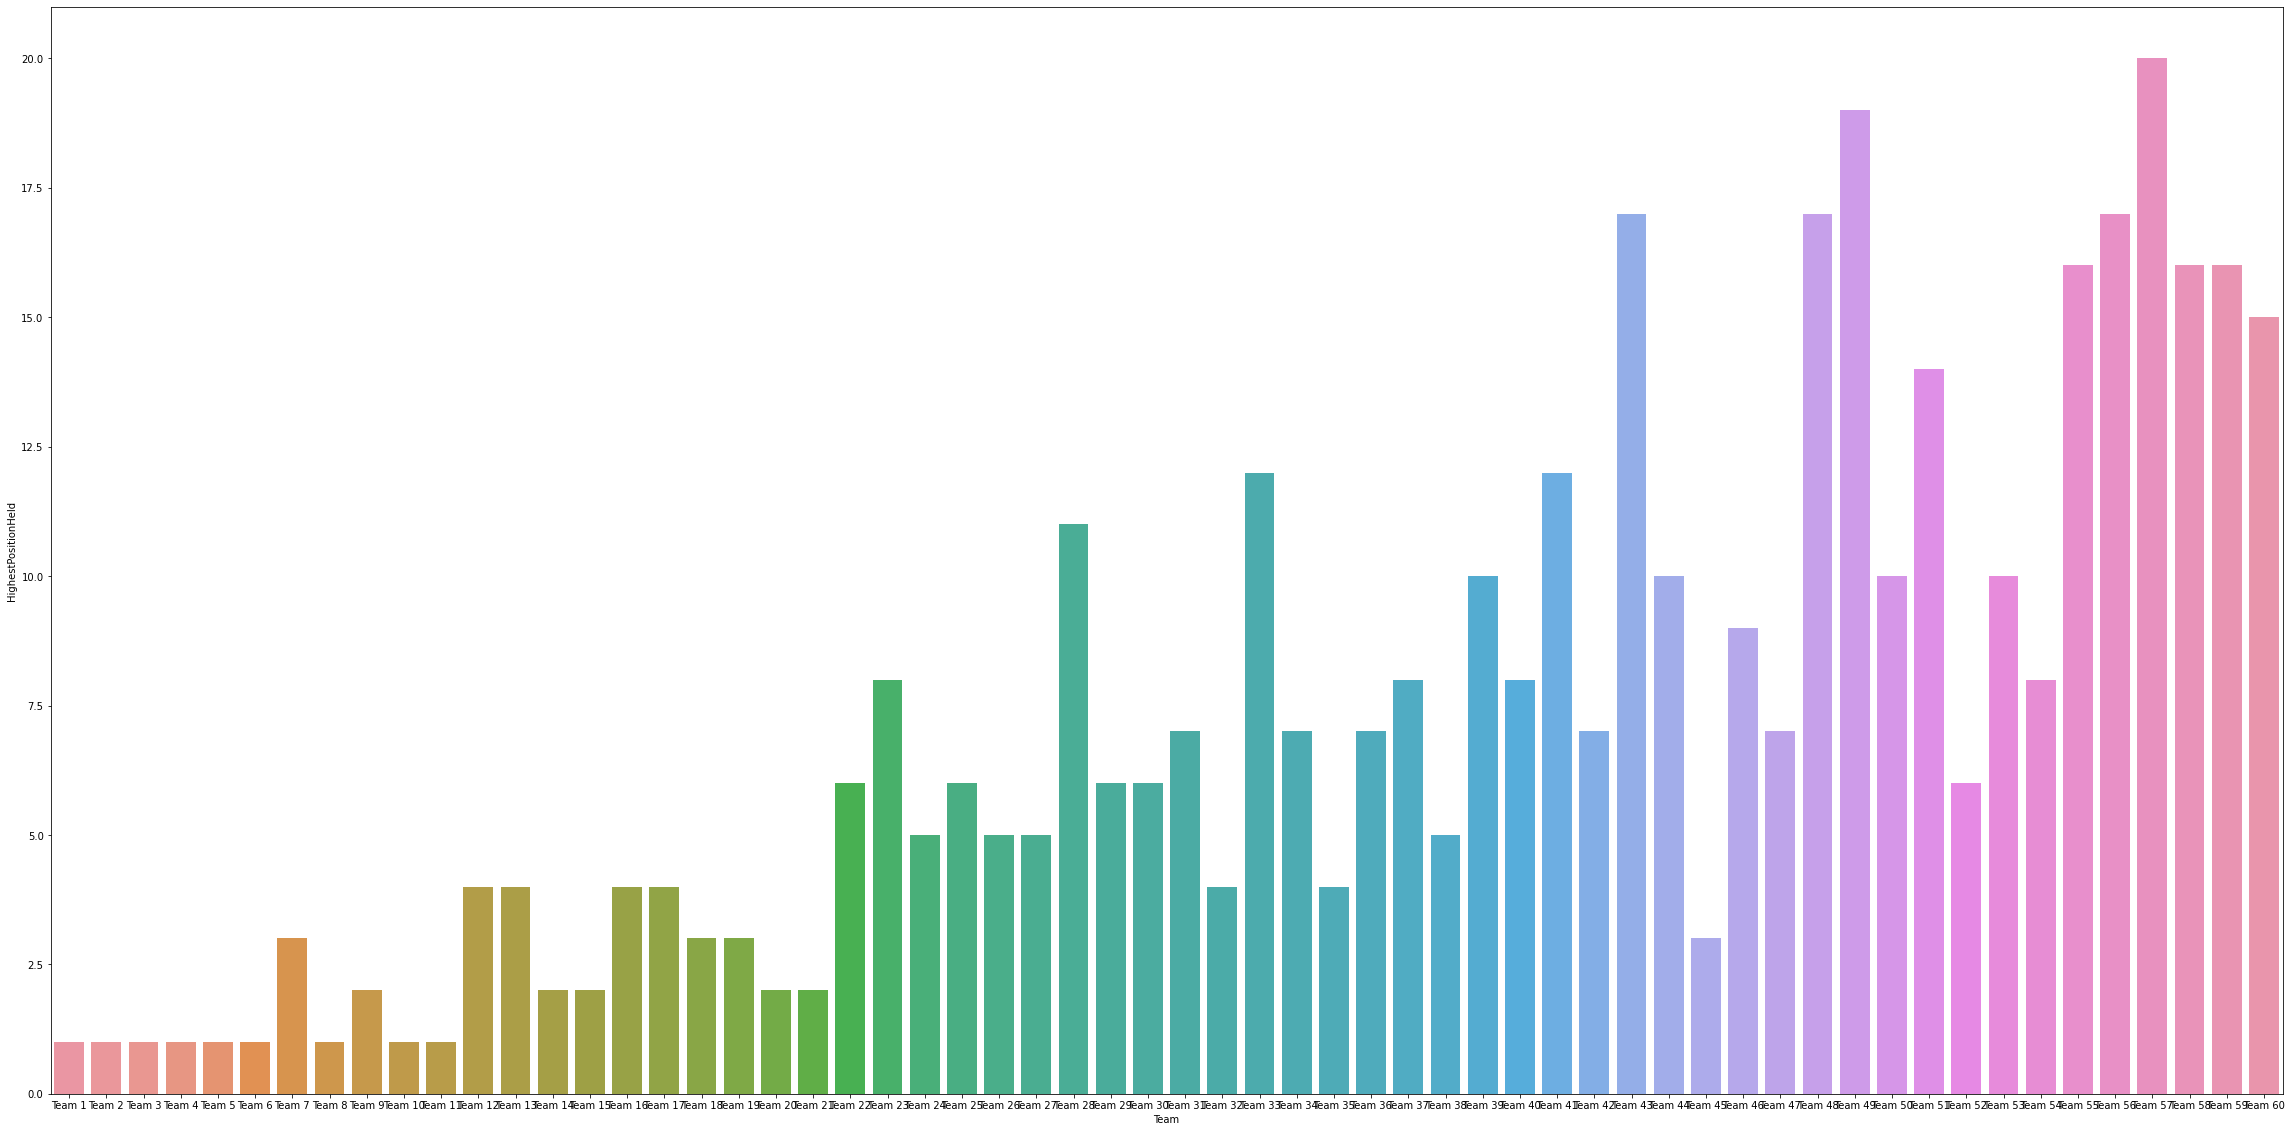

In [326]:
fig,ax = plt.subplots(figsize = (40,20))
sns.barplot(x="Team", y="HighestPositionHeld",data = df,ax=ax)
plt.show()

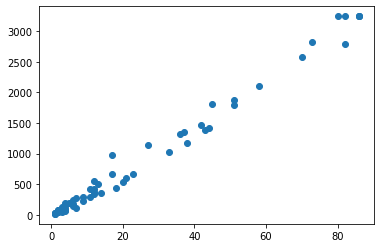

In [294]:
plt.scatter(df['Tournament'], df['Score'])
plt.show()

<AxesSubplot:xlabel='BasketScored', ylabel='BasketGiven'>

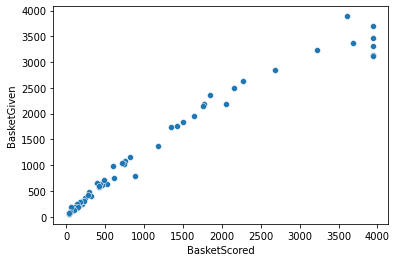

In [295]:
sns.scatterplot(data=df, x='BasketScored', y='BasketGiven')

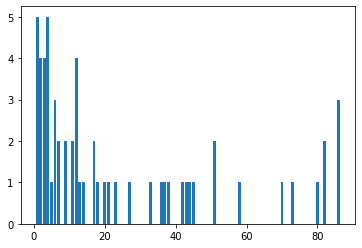

<AxesSubplot:xlabel='HighestPositionHeld', ylabel='count'>

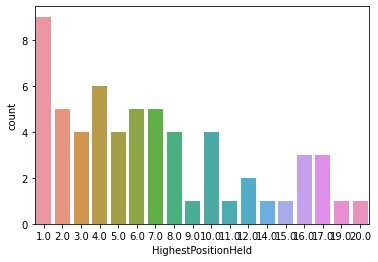

In [296]:
# Create a bar plot of the 'Tournament' column
plt.bar(df['Tournament'].value_counts().index, df['Tournament'].value_counts().values)
plt.show()

# Create a bar plot of the 'HighestPositionHeld' column using seaborn
sns.countplot(x='HighestPositionHeld', data=df)

In [329]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TeamLaunch',
       'HighestPositionHeld', 'Winning_Percentage', 'Loss_Percentage'],
      dtype='object')

In [330]:
num_colums.columns

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TeamLaunch',
       'HighestPositionHeld', 'Winning_Percentage', 'Loss_Percentage'],
      dtype='object')

<AxesSubplot:ylabel='Tournament'>

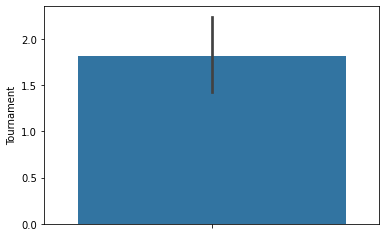

In [298]:
sns.barplot(y = df['Tournament'].value_counts())

<AxesSubplot:xlabel='Tournament', ylabel='Team'>

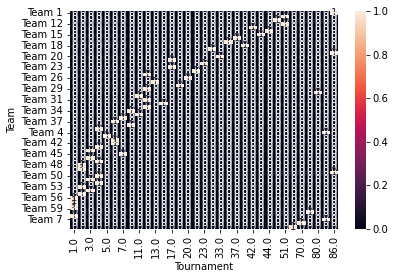

In [299]:
ct =  pd.crosstab(df['Team'], df['Tournament'])
sns.heatmap(ct, annot =True)

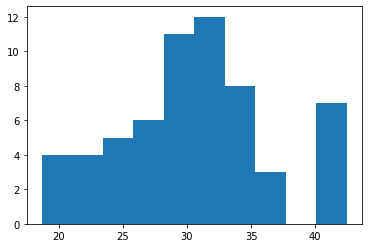

In [331]:
plt.hist(df['Winning_Percentage'])
plt.show()

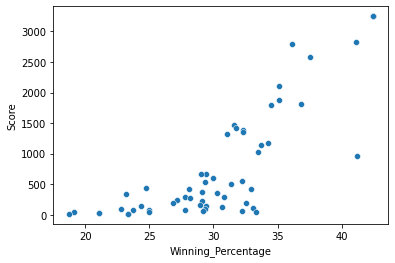

In [333]:
sns.scatterplot(x = df['Winning_Percentage'], y = df['Score'])
plt.show()

<AxesSubplot:>

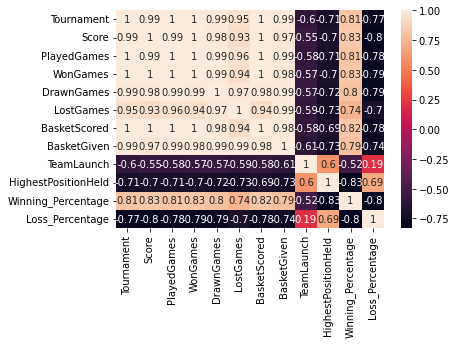

In [334]:
sns.heatmap(df.corr(),annot = True)

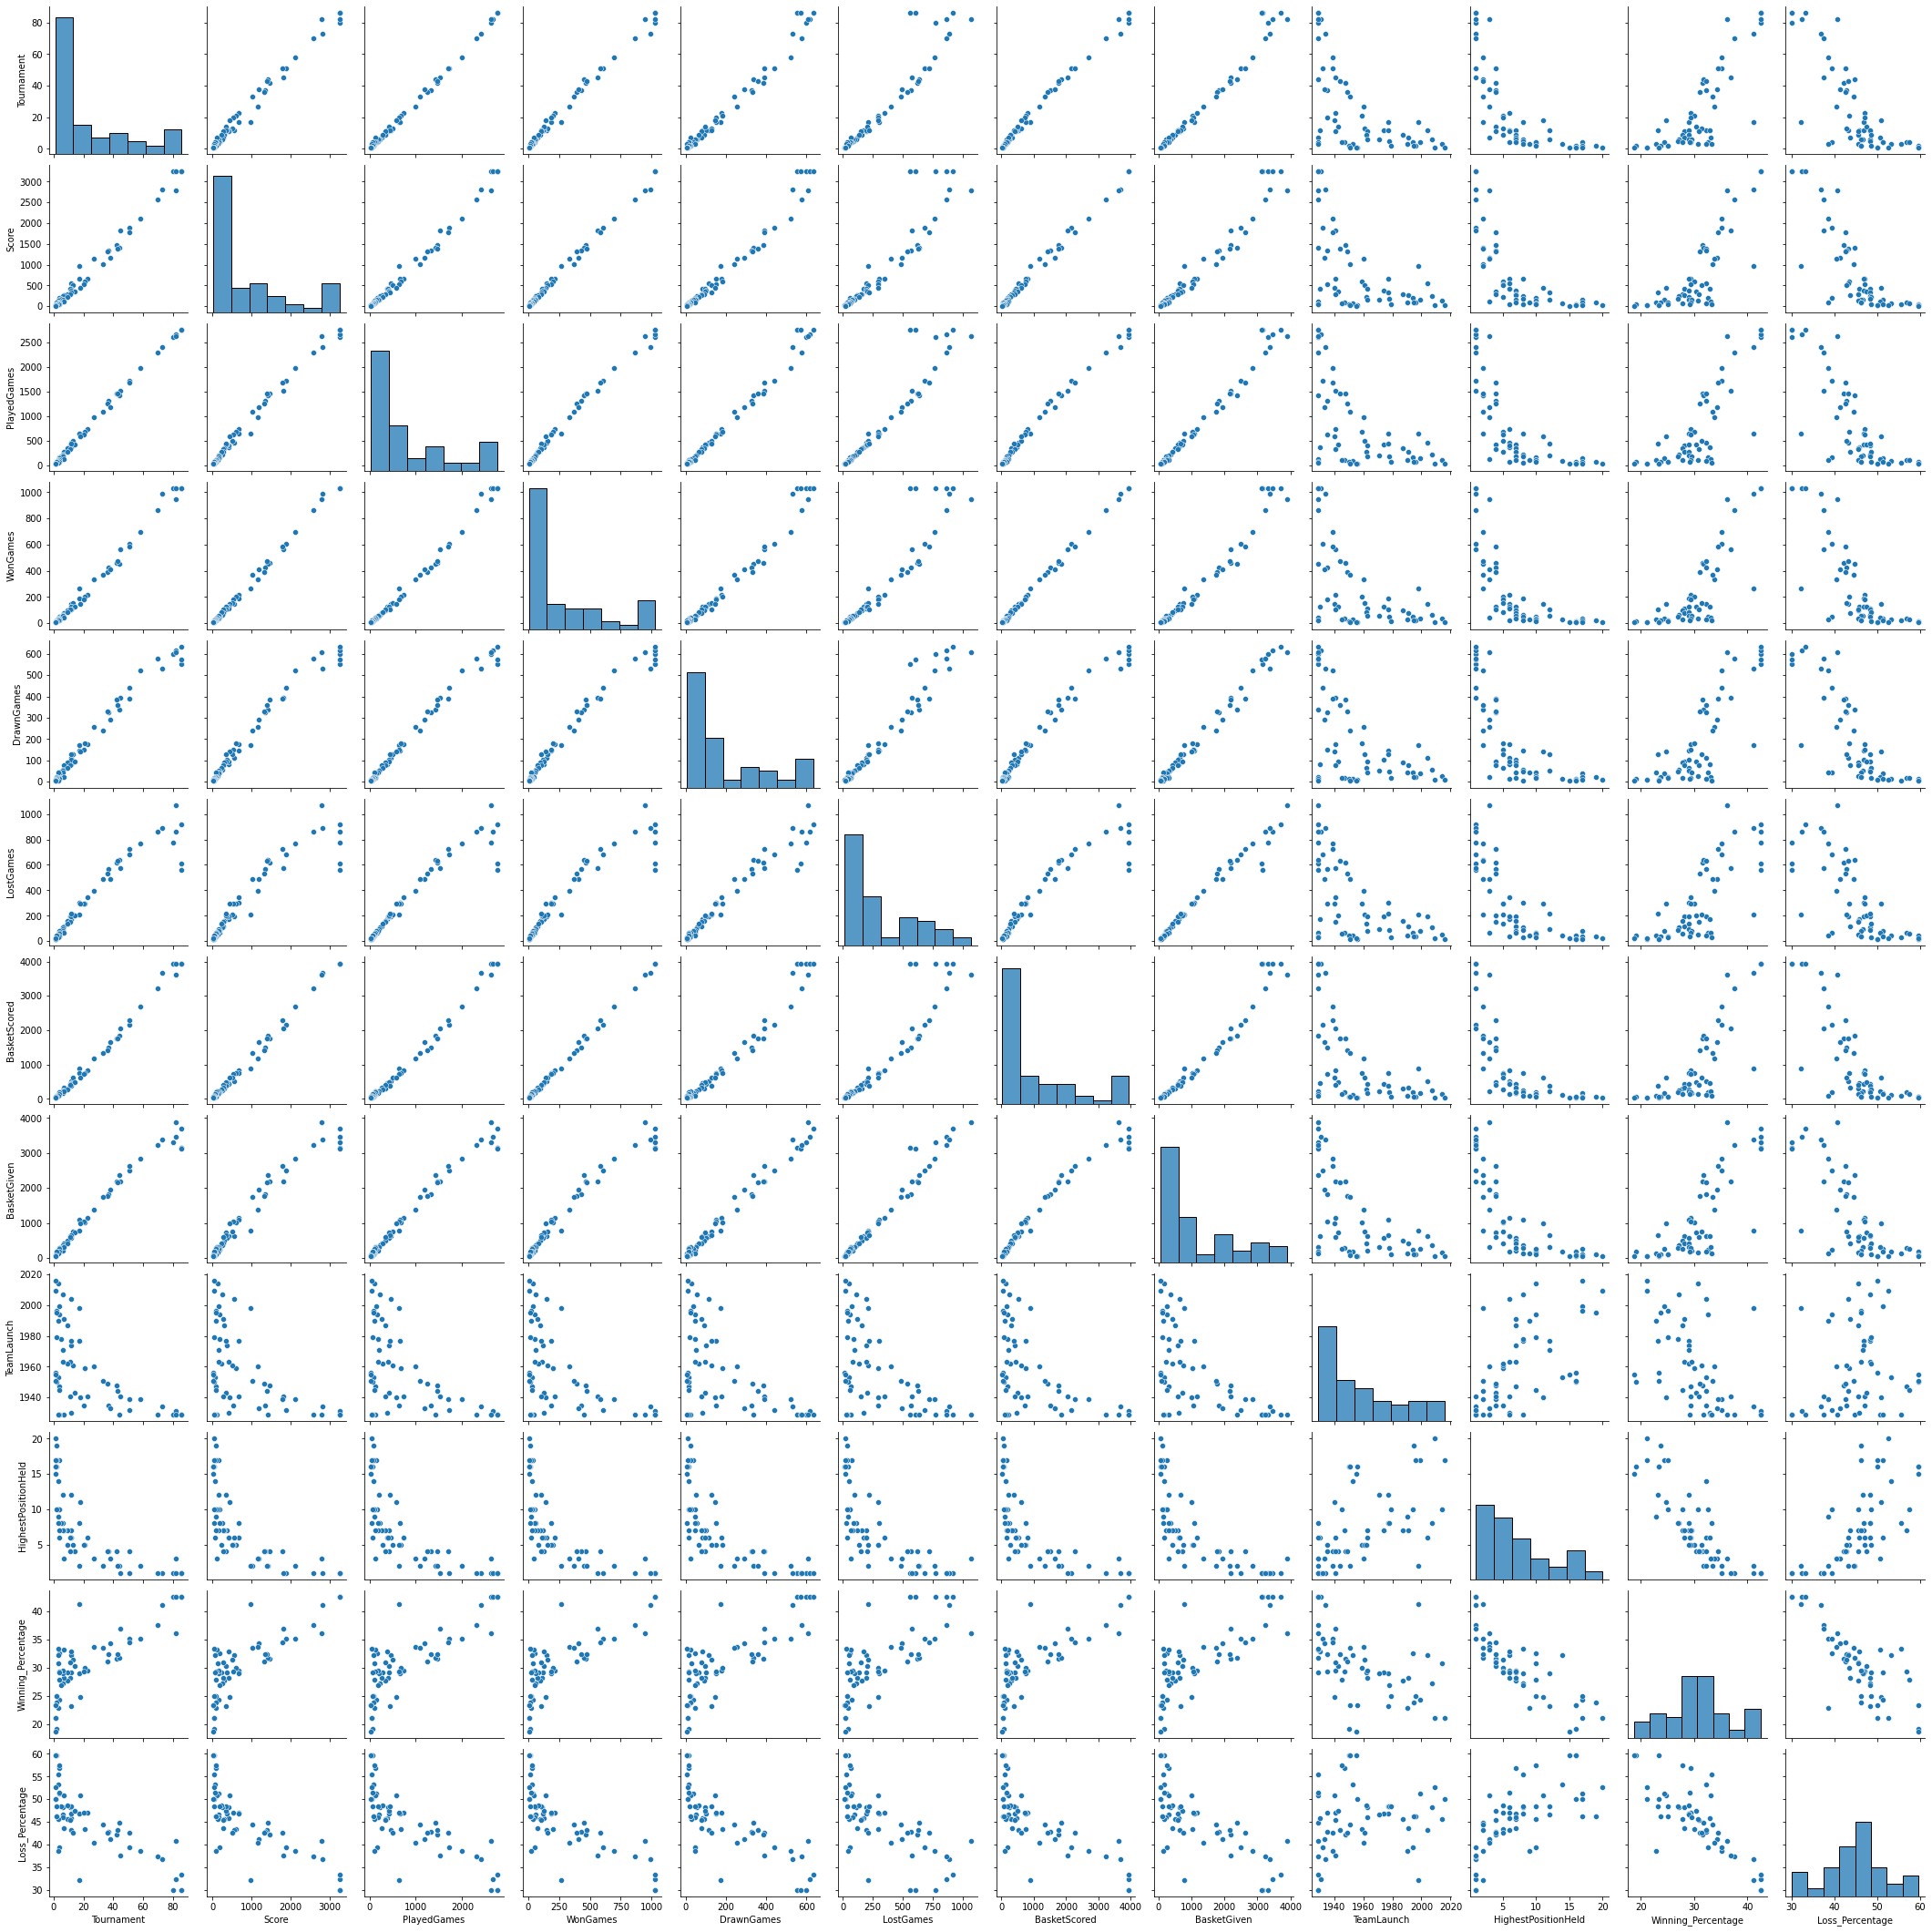

In [335]:
sns.pairplot(df)